In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization Plot Settings
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [3]:
insurance = pd.read_csv("C:/Users/Dinesh_Saini/Downloads/insurance (2).csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [6]:
# check for the missing values
insurance.dropna(inplace = True)

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [8]:
insurance["region"] =insurance["region"].str.lower()

In [9]:
FEMALE = 'female'
MALE = 'male'
se_map = {'F':FEMALE,'woman':FEMALE,'man':MALE,'M':MALE}
insurance['sex'] = insurance['sex'].replace(se_map)
insurance['charges'] = insurance['charges'].str.strip("$").astype("float64")

In [10]:
def weight(x):
    if x < 18.000:
        return 'underweigth'
    elif x < 25.000:
        return 'normal'
    elif x < 30.000:
        return 'overweight'
    else: 
        return "obese"
    

In [11]:
insurance['weight_status'] = insurance['bmi'].apply(weight)

In [12]:
insurance.describe()

,age,bmi,children,charges
count,1208.000000,1208.000000,1208.000000,1207.000000
mean,35.355960,30.574971,0.942881,13311.273947
std,22.061241,6.117562,1.311809,12136.057425
min,-64.000000,15.960000,-4.000000,1121.873900
25%,24.750000,26.195000,0.000000,4749.061450
50%,38.000000,30.230000,1.000000,9447.250350
75%,51.000000,34.580000,2.000000,16582.138605
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# convert all the neagtive values to the positive.
insurance = insurance.apply(lambda x:x.abs() if np.issubdtype(x.dtype,np.number)else x)

In [14]:
# Separating Categorical & Numerical Values
cats = ['sex', 'smoker', 'region', 'weight_status']
nums = ['age', 'bmi', 'children', 'charges']

# EDA 

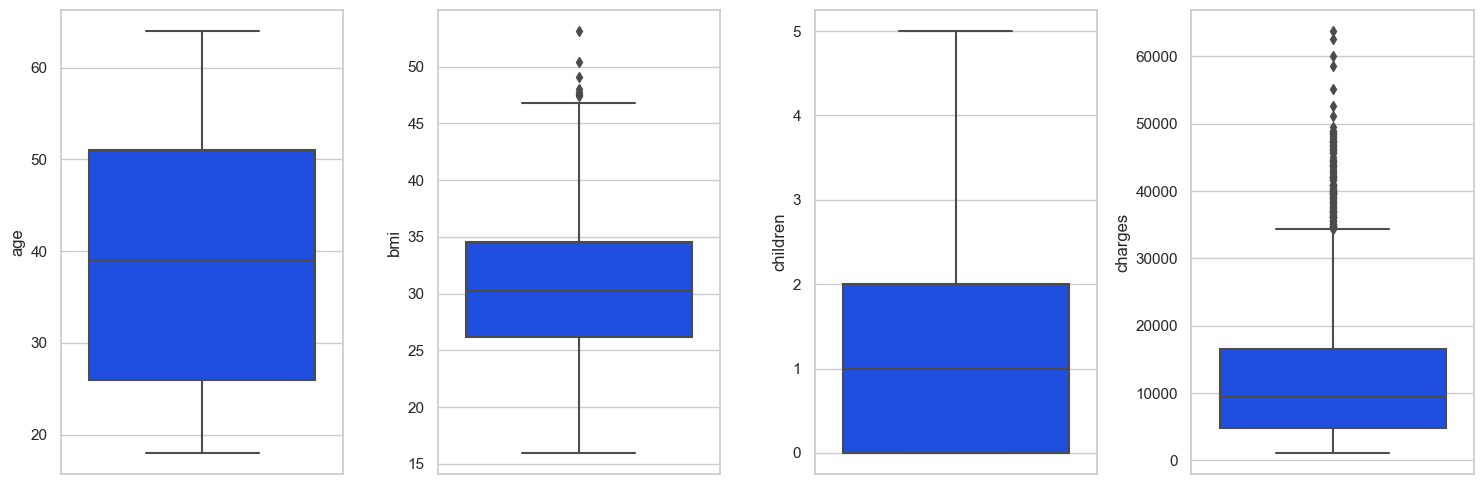

In [15]:
for i in range(len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y=insurance[nums[i]])
    plt.tight_layout()

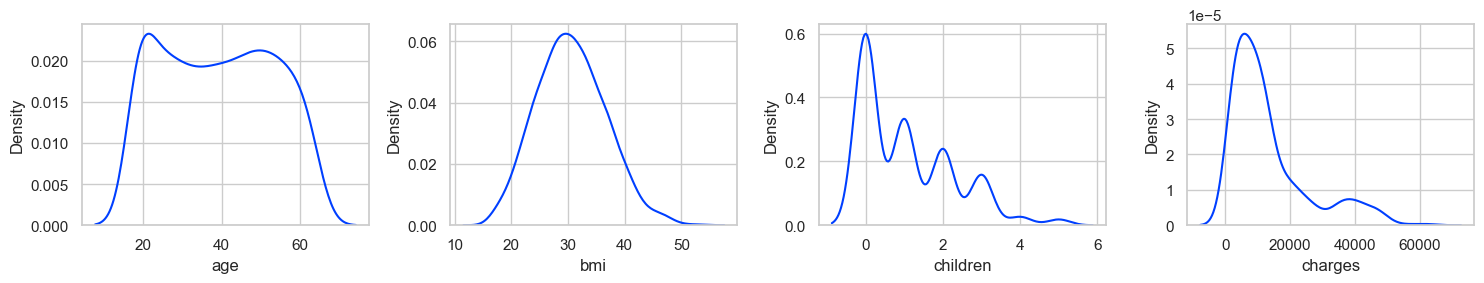

In [16]:
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.kdeplot(x = insurance[nums[i]])
    plt.tight_layout()

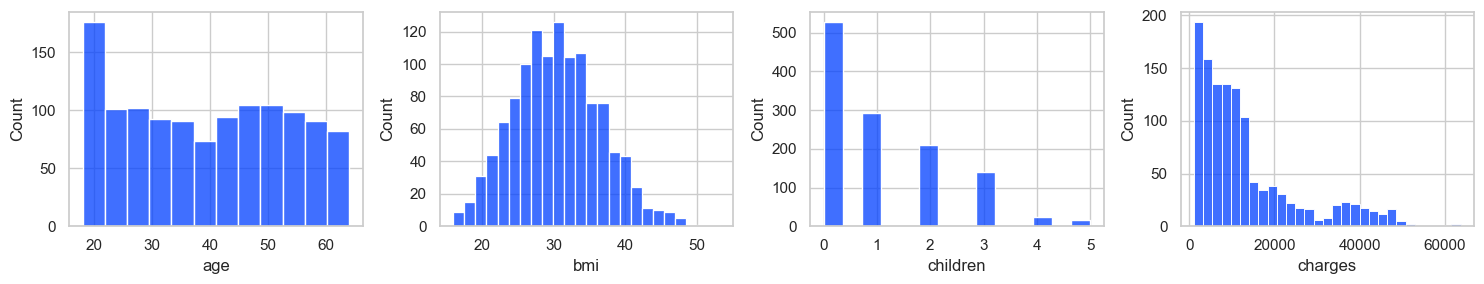

In [17]:
plt.figure(figsize=(15, 3))
for i in range(len(nums)):
    plt.subplot(1,len(nums), i+1)
    sns.histplot(insurance[nums[i]])
    plt.tight_layout()

In [18]:
cats

['sex', 'smoker', 'region', 'weight_status']

In [19]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1208 non-null   float64
 1   sex            1208 non-null   object 
 2   bmi            1208 non-null   float64
 3   children       1208 non-null   float64
 4   smoker         1208 non-null   object 
 5   region         1208 non-null   object 
 6   charges        1207 non-null   float64
 7   weight_status  1208 non-null   object 
dtypes: float64(4), object(4)
memory usage: 84.9+ KB


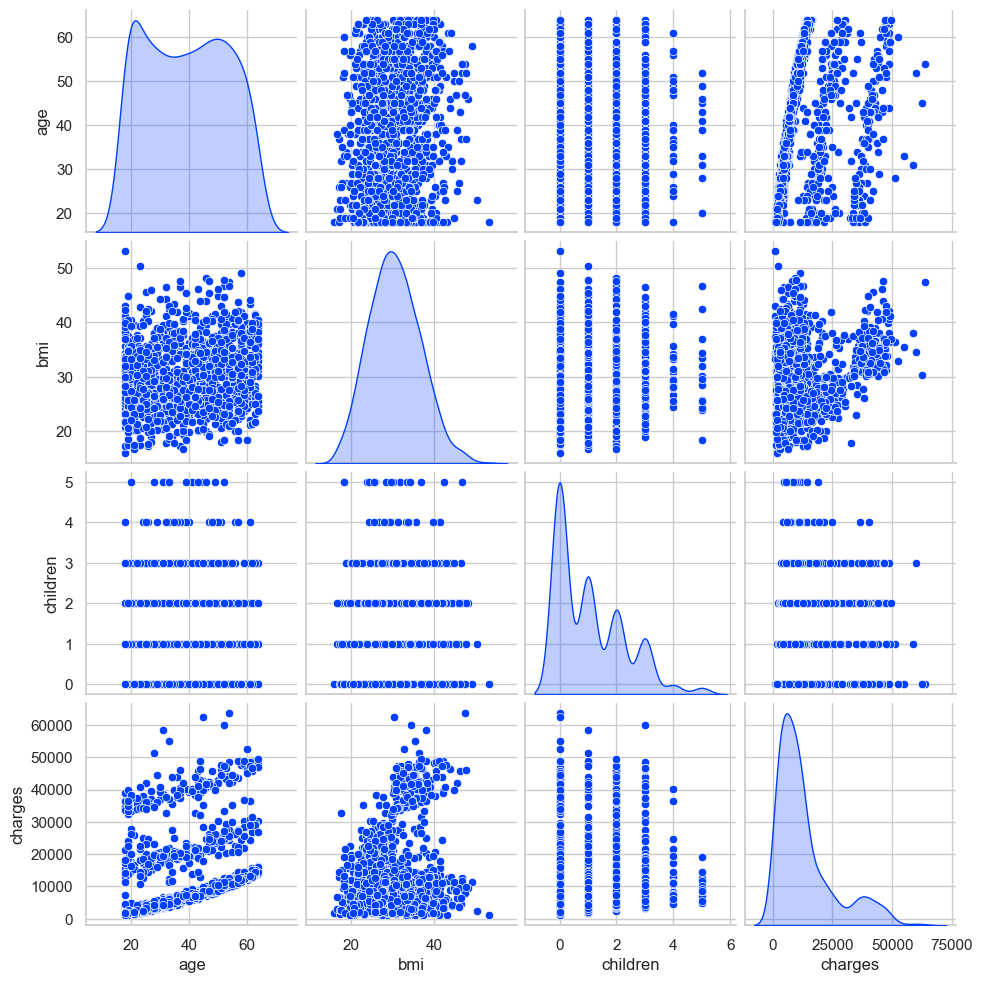

In [20]:
sns.pairplot(insurance, diag_kind='kde')

<Axes: >

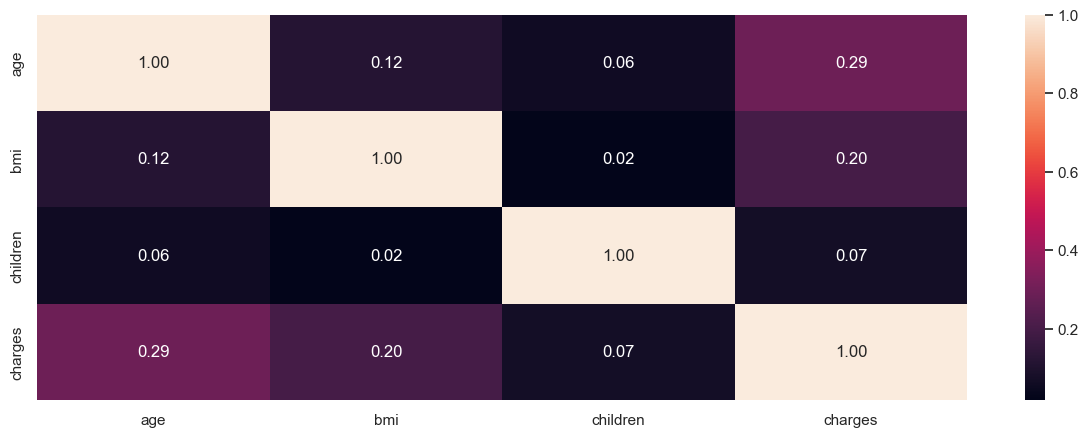

In [21]:
sns.heatmap(insurance.corr(), annot=True, fmt='.2f')

In [22]:
insurance['sex'] = insurance['sex'].astype('category')

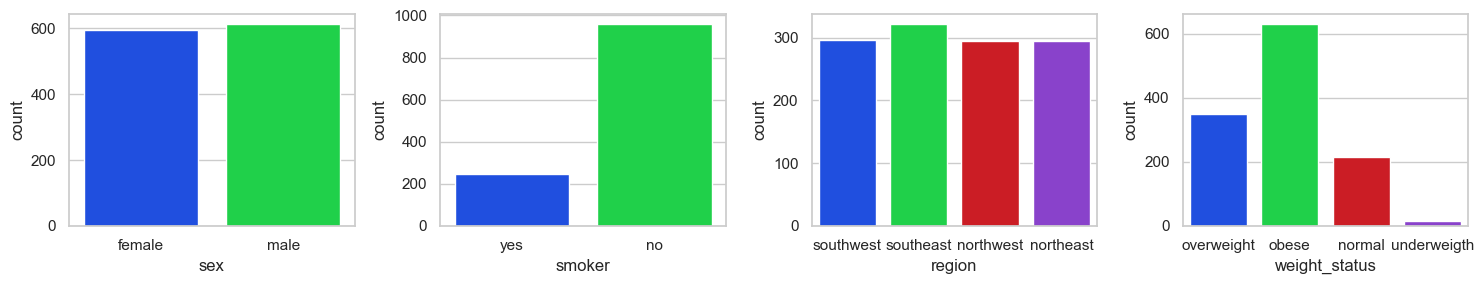

In [23]:
plt.figure(figsize=(15, 3))
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i + 1)
    sns.countplot(x = insurance[cats[i]])
    plt.tight_layout()

<Axes: xlabel='bmi', ylabel='charges'>

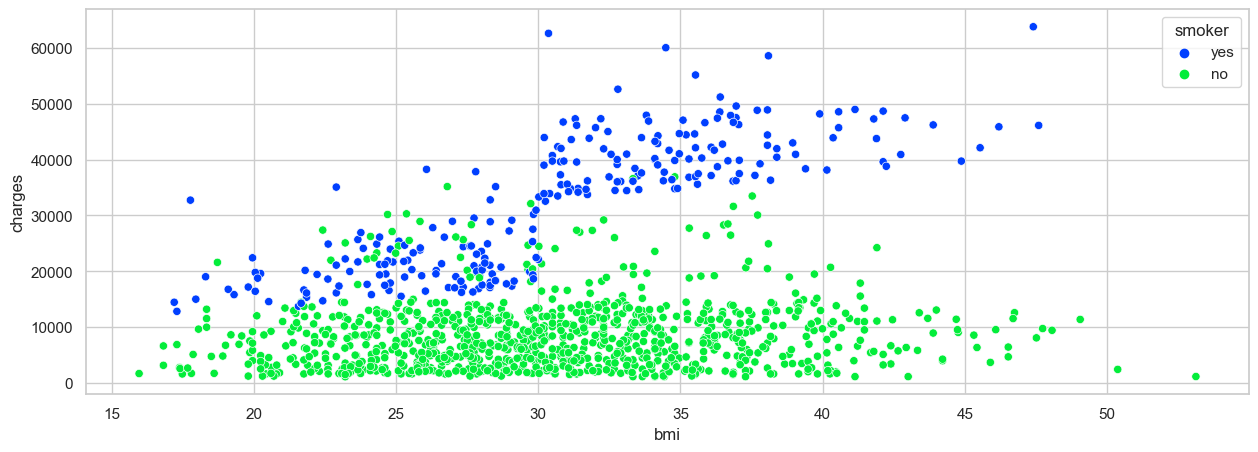

In [24]:
sns.scatterplot(x = 'bmi', y = 'charges' ,hue = 'smoker', data = insurance)

<Axes: xlabel='age', ylabel='charges'>

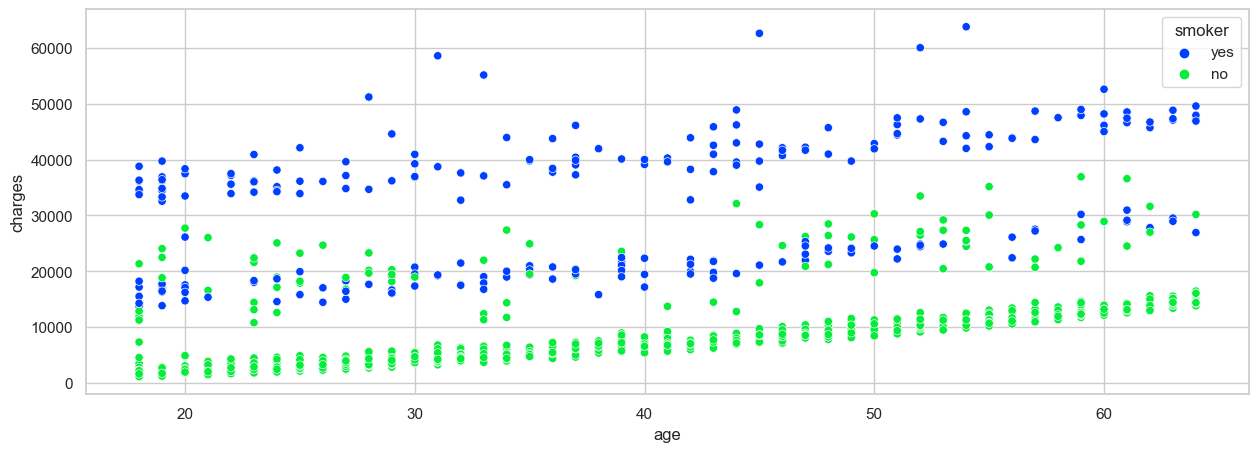

In [25]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = insurance)

In [26]:
region_charges = insurance.groupby('region')['charges'].sum().reset_index()
region_charges.sort_values(['charges'],ascending = False)

,region,charges
2,southeast,4.739906e+06
0,northeast,3.938735e+06
3,southwest,3.734443e+06
1,northwest,3.653624e+06


<Axes: xlabel='region', ylabel='charges'>

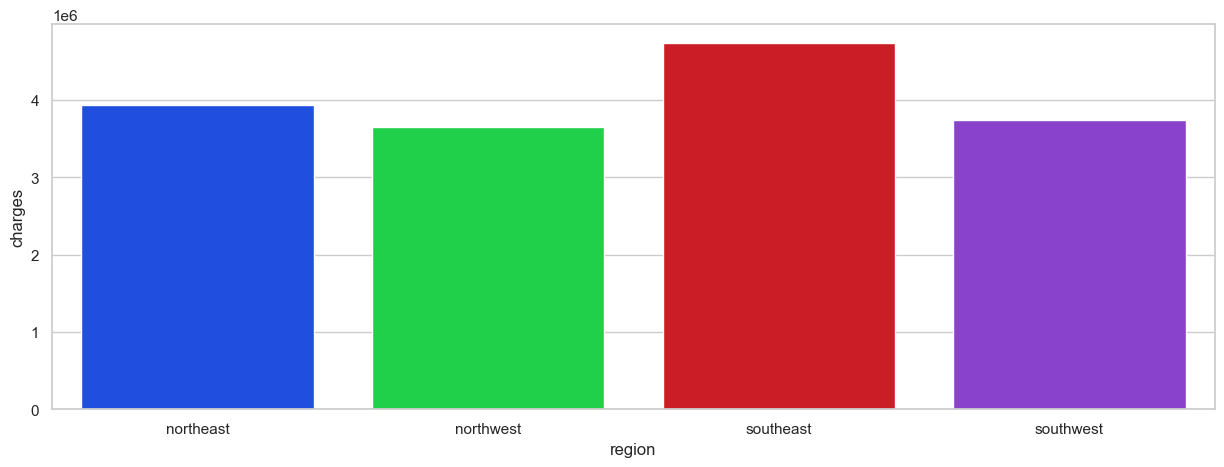

In [27]:
sns.barplot(x = "region", y = "charges", data = region_charges)

<Axes: xlabel='region', ylabel='charges'>

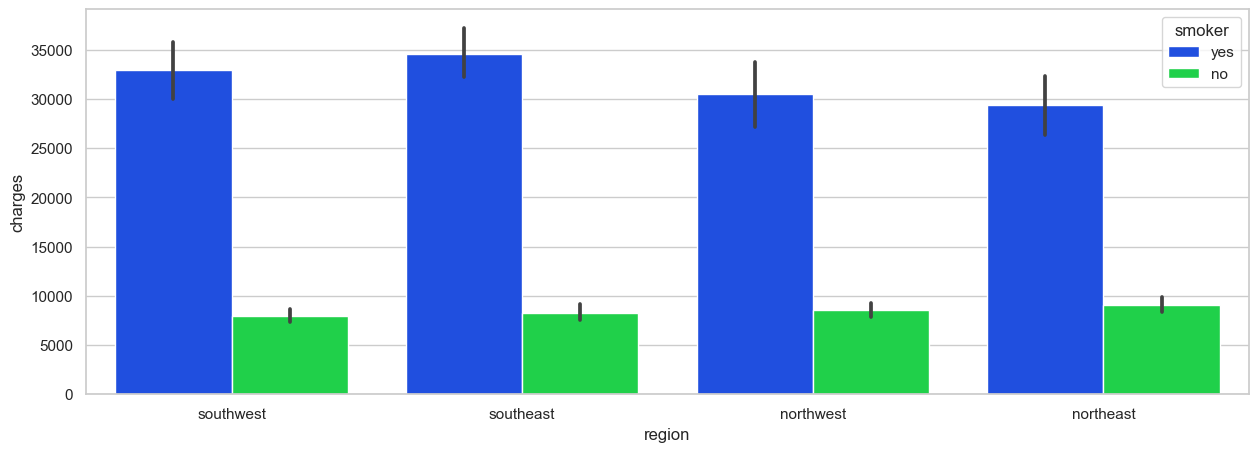

In [28]:
sns.barplot(x = "region", y = "charges", hue = "smoker" ,data = insurance)

<Axes: xlabel='region', ylabel='charges'>

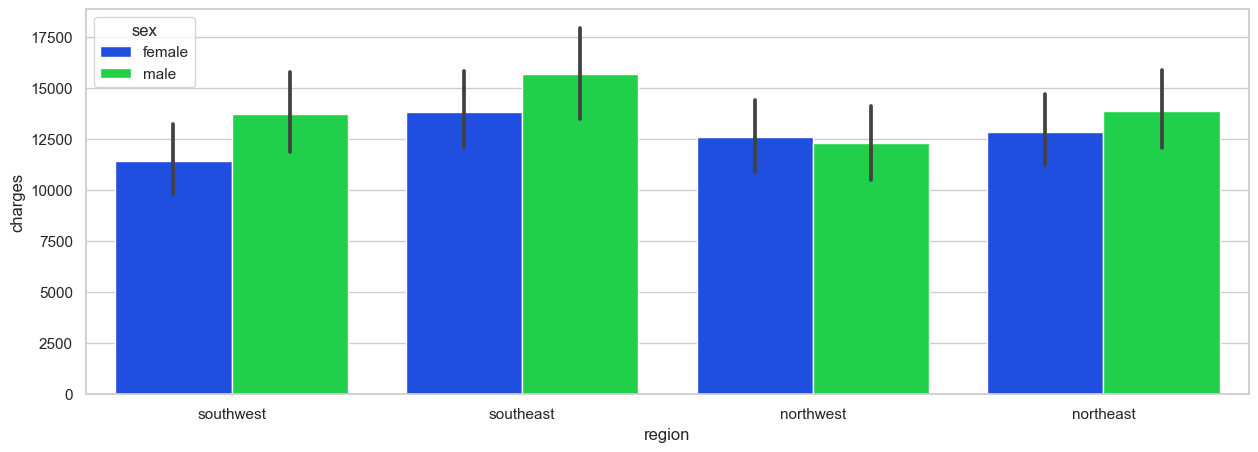

In [29]:
sns.barplot(x = "region", y = "charges", hue = "sex" ,data = insurance)

Observation - In all the region the insurance cost for the males is more than female.

In [30]:
smoker_sex  = insurance.groupby(['smoker','sex']).agg({'charges' : 'count'}).reset_index()
smoker_sex.columns = ['smoker', 'sex', 'count']
smoker_sex.sort_values(['smoker', 'count'], ascending = False)

,smoker,sex,count
3,yes,male,144
2,yes,female,104
0,no,female,491
1,no,male,468


<Axes: xlabel='sex', ylabel='count'>

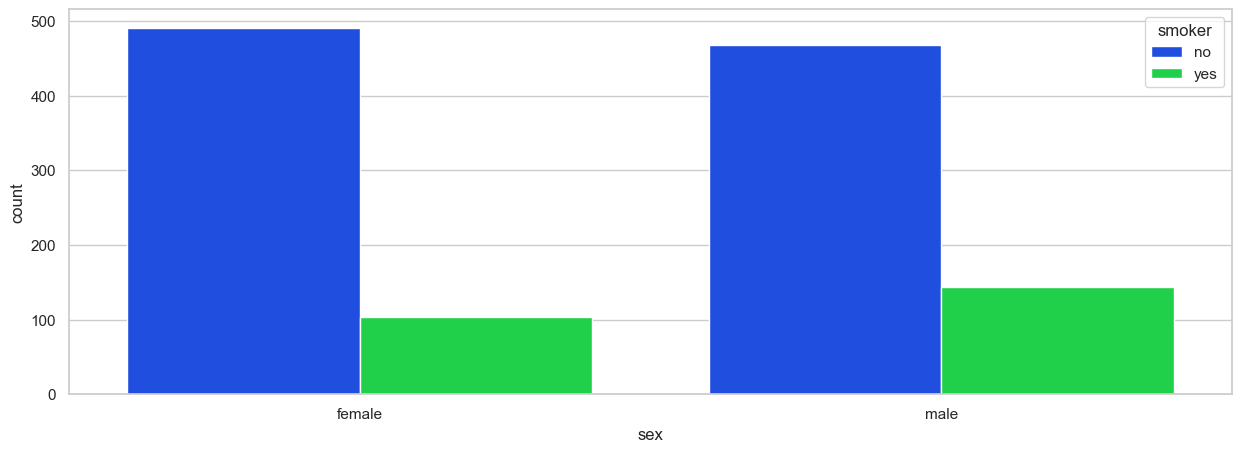

In [31]:
sns.barplot(x = "sex", y ="count" , hue= "smoker", data = smoker_sex)

Observation- Insurance cost for males is more than female because males smokes more than female.

<Axes: xlabel='children', ylabel='charges'>

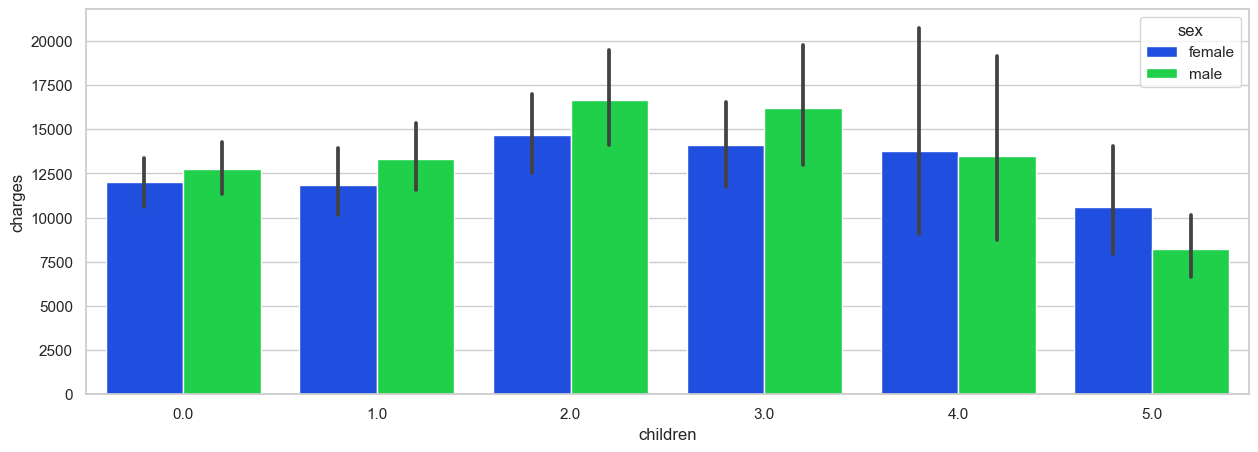

In [32]:
sns.barplot(x = 'children', y = 'charges', hue = 'sex', data = insurance)

<Axes: xlabel='children', ylabel='charges'>

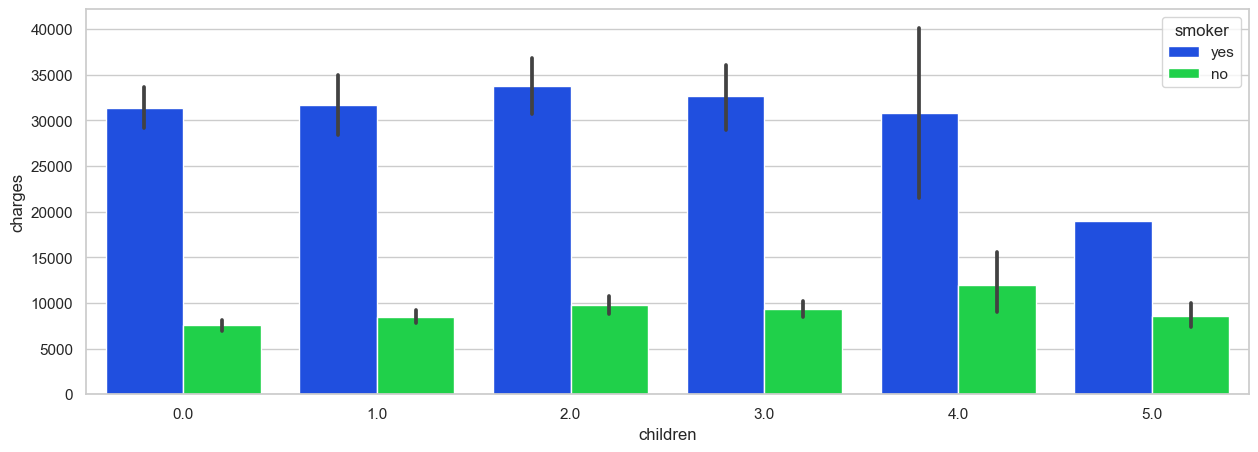

In [33]:
sns.barplot(x = 'children', y = 'charges', hue = 'smoker', data = insurance)

In [38]:
smoker_status  = insurance.groupby(['weight_status','smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'count')
smoker_status


,weight_status,smoker,count
0,normal,no,169
1,normal,yes,45
2,obese,no,497
3,obese,yes,132
4,overweight,no,283
5,overweight,yes,67
6,underweigth,no,10
7,underweigth,yes,4


<Axes: xlabel='weight_status', ylabel='count'>

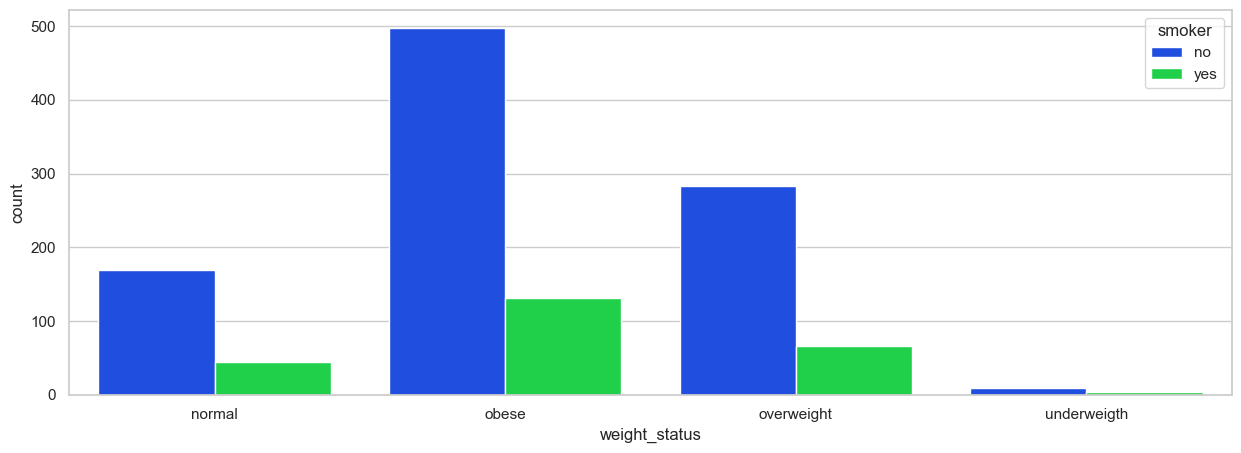

In [39]:
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status)

In [40]:
smoker_status = insurance.groupby(['weight_status', 'smoker']).agg({'charges' : 'sum'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'charges')
smoker_status 

,weight_status,smoker,charges
0,normal,no,1.334516e+06
1,normal,yes,8.837432e+05
2,obese,no,4.411581e+06
3,obese,yes,5.490486e+06
4,overweight,no,2.334521e+06
5,overweight,yes,1.501946e+06
6,underweigth,no,3.488781e+04
7,underweigth,yes,7.502586e+04


In [41]:
smoker_status_charges = insurance.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status_charges.columns = ['weight_status', 'smoker', 'count']
smoker_status_charges['total'] = smoker_status_charges.groupby(['weight_status'])['count'].transform('sum')
smoker_status_charges

,weight_status,smoker,count,total
0,normal,no,169,214
1,normal,yes,45,214
2,obese,no,497,629
3,obese,yes,132,629
4,overweight,no,283,350
5,overweight,yes,67,350
6,underweigth,no,10,14
7,underweigth,yes,4,14


In [44]:
condition_cost = smoker_status.merge(smoker_status_charges, 
                   left_on = ['weight_status', 'smoker'],
                    right_on = ['weight_status', 'smoker'],
                    how = 'inner')
condition_cost

,weight_status,smoker,charges,count,total
0,normal,no,1.334516e+06,169,214
1,normal,yes,8.837432e+05,45,214
2,obese,no,4.411581e+06,497,629
3,obese,yes,5.490486e+06,132,629
4,overweight,no,2.334521e+06,283,350
5,overweight,yes,1.501946e+06,67,350
6,underweigth,no,3.488781e+04,10,14
7,underweigth,yes,7.502586e+04,4,14


In [45]:
# Average Charges
condition_cost['avg_charges'] = condition_cost['charges'] / condition_cost['count']
condition_cost

,weight_status,smoker,charges,count,total,avg_charges
0,normal,no,1.334516e+06,169,214,7896.546834
1,normal,yes,8.837432e+05,45,214,19638.737014
2,obese,no,4.411581e+06,497,629,8876.419762
3,obese,yes,5.490486e+06,132,629,41594.592306
4,overweight,no,2.334521e+06,283,350,8249.191683
5,overweight,yes,1.501946e+06,67,350,22417.109601
6,underweigth,no,3.488781e+04,10,14,3488.781325
7,underweigth,yes,7.502586e+04,4,14,18756.466225


<Axes: xlabel='weight_status', ylabel='avg_charges'>

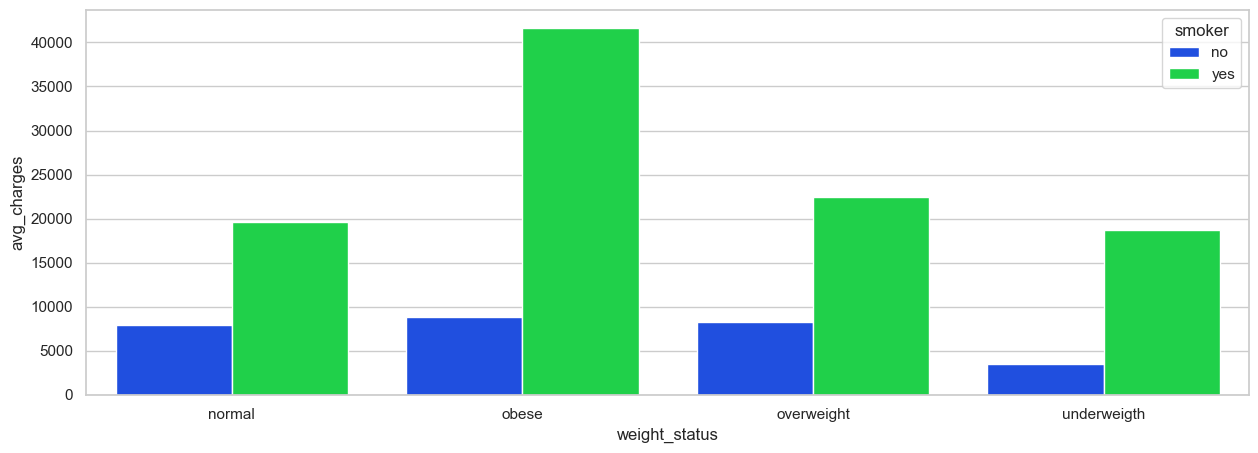

In [46]:
sns.barplot(x = 'weight_status', y = 'avg_charges', hue = 'smoker', data = condition_cost)

The insights drawn by performing Exploratory Data Analysis (EDA) are:

- Most people are a non smokers & obese
- Feature sex, region has an almost balanced amount
- People who smoke & have a higher BMI, has higher medical charges
- Older people who smoke have more expensive charges
- An obese person who smokes have higher charges